In [5]:
import numpy as np
import librosa
from librosa import display
import time
import IPython.display as ipd
import matplotlib.pyplot as plt

Let's load a short clip from a song using librosa.

In [6]:
song_clip, sr = librosa.load('zzzwh2ktIWjsR7xp.mp3')
print('The sampling rate is', sr, 'Hz')
ipd.Audio('zzzwh2ktIWjsR7xp.mp3')

C:\Users\dillo\anaconda3\envs\ee301\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The sampling rate is 22050 Hz


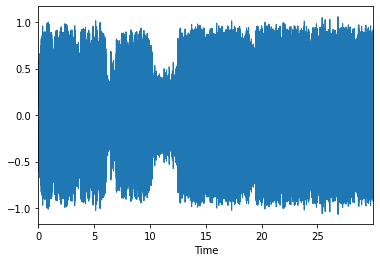

In [7]:
display.waveplot(song_clip, sr=sr)

First, let's try running a DFT on segments of the song clip. We can simply define the DFT according to the definition as follows: 

In [9]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

Now let's segment the song clip into different lengths N.

Note that we have not applied a window to these segments; instead, we are just truncating. We will see the advantages of applying a window when we explore STFTs. For now, we are only investigating the complexity and runtime of the DFT.

Also note that the segments we are producing correspond to approx. 10-30 ms chunks of audio (220/22050 ~ 0.01).

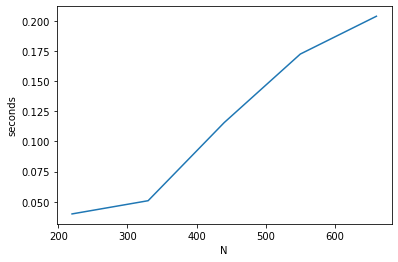

In [10]:
N_list = np.arange(220, 770, 110)

dft_times = []
for N in N_list:
    
    y = song_clip[:N]
    
    t_start = time.time()
    DFT(y)
    t_stop = time.time()
    dft_times.append(t_stop - t_start)
    
plt.plot(N_list, dft_times)
plt.ylabel('seconds')
plt.xlabel('N')
plt.show()

The runtime does in fact some to be increasing quickly as N increases. Now let's compare it against the FFT, as implemented in numpy.

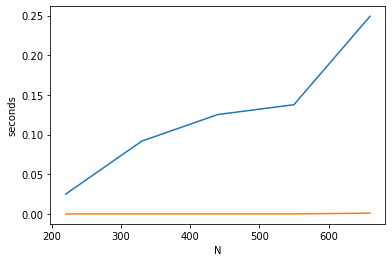

In [11]:
N_list = np.arange(220, 770, 110)

dft_times = []
fft_times = []
for N in N_list:
    
    y = song_clip[:N]
    
    t_start = time.time()
    DFT(y)
    t_stop = time.time()
    dft_times.append(t_stop - t_start)
    
    t_start = time.time()
    np.fft.fft(y)
    t_stop = time.time()
    fft_times.append(t_stop - t_start)
    
plt.plot(N_list, dft_times)
plt.plot(N_list, fft_times)
plt.xlabel('N')
plt.ylabel('seconds')
plt.show()

Let's keep on increase the length of DFT, N. Notice that the runtime becomes non-trivial.

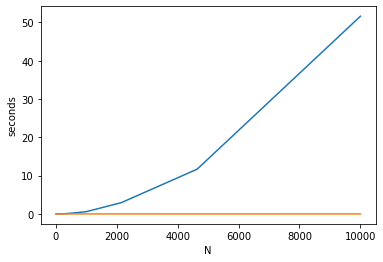

In [12]:
N_list = np.logspace(1, 4, 10).astype(int)

dft_times = []
fft_times = []
for N in N_list:
    
    y = song_clip[:N]
    
    t_start = time.time()
    DFT(y)
    t_stop = time.time()
    dft_times.append(t_stop - t_start)
    
    t_start = time.time()
    np.fft.fft(y)
    t_stop = time.time()
    fft_times.append(t_stop - t_start)
    
plt.plot(N_list, dft_times)
plt.plot(N_list, fft_times)
plt.xlabel('N')
plt.ylabel('seconds')
plt.show()

We can plot the spectrum using the fft as follows:

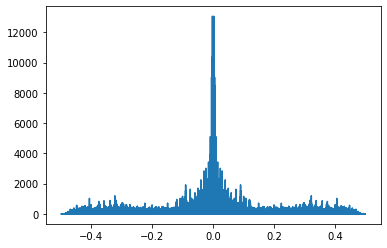

In [13]:
import matplotlib.pyplot as plt
n = np.arange(len(song_clip))
sp = np.fft.fft(song_clip)
freq = np.fft.fftfreq(len(n))
plt.plot(freq, np.abs(sp))
plt.show()

Assuming a real input signal, we can also get a quick speedup using rfft:

In [17]:
t_start = time.time()
np.fft.fft(song_clip)
t_stop = time.time()
print('fft:', t_stop - t_start)

t_start = time.time()
np.fft.rfft(song_clip)
t_stop = time.time()
print('rfft:', t_stop - t_start)

fft: 0.32834887504577637
rfft: 0.17264080047607422


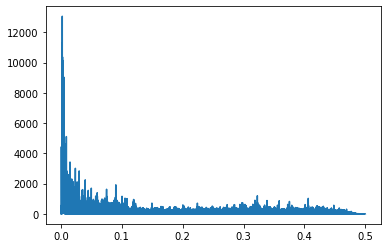

In [18]:
sp = np.fft.rfft(song_clip)
freq = np.fft.rfftfreq(len(song_clip))
plt.plot(freq, np.abs(sp))
plt.show()

Using Parseval's theorem to check the total energy of the input signal.

In [ ]:
N = len(song_clip)
y = song_clip

Y_w = np.fft.fft(y)

parseval_y = np.sum(y**2)
parseval_Y_w = (1/N)*np.sum(np.abs(Y_w)**2)

print('Time-domain energy:', parseval_y)
print('Frequency-domain energy:', parseval_Y_w)

Spectrogram for the song clip:

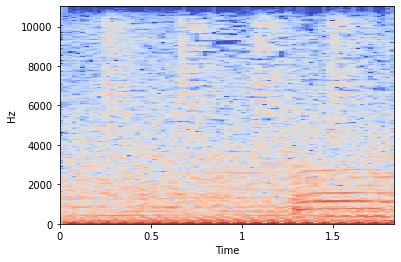

In [14]:
Y = librosa.stft(y, n_fft = 512, window = 'hamming')
Ydb = librosa.amplitude_to_db(abs(Y))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')